In [235]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cho_pha_go_train
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 150
model = cho_pha_go_train.AlphaGoZeroNet(5)
model.to('cpu')
# breakpoint()
model.load('models/cho_pha_go_5x5.pt', 'cpu')

Model loaded from models/cho_pha_go_5x5.pt.


In [236]:
sum(p.numel() for p in model.parameters())

199512

In [237]:
dic = {}
for k, v in model.losses.items():
    dic[k] = np.mean(v)

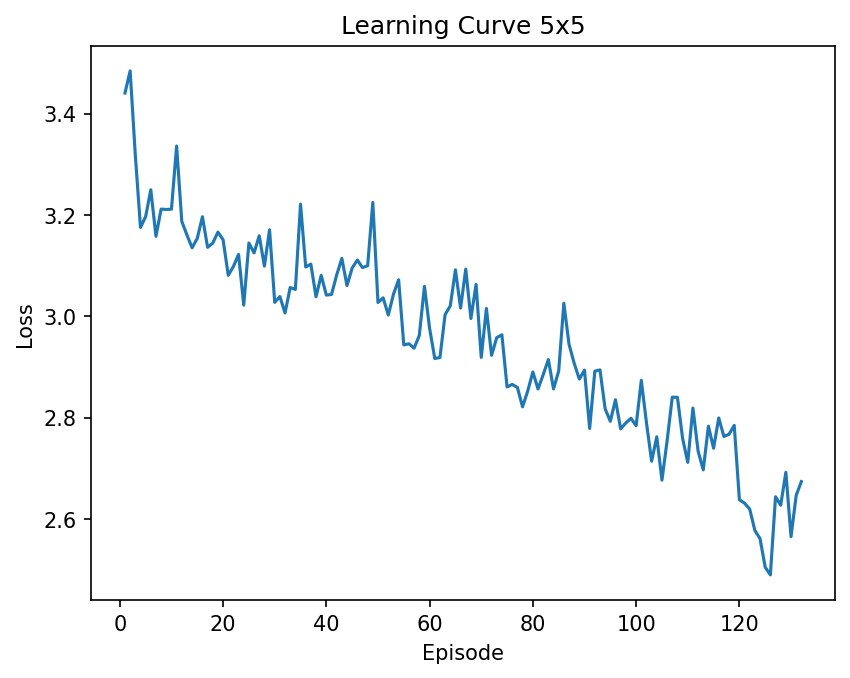

In [238]:
pd.Series(dic).sort_index().plot()
# temperature changed from 319
# plt.axvline(891, color='r', alpha=0.3)
# plt.text(891, 3.4, '<- network trust: 0.2 -> 0.5', size=6)

# plt.axvline(891+2241, color='r', alpha=0.3)
# plt.text(891+2241, 3.4, '<- network trust: 0.5 -> 1.0\nexploration 0.9 -> 0.5', size=6)

plt.title('Learning Curve 5x5')
plt.xlabel('Episode')
plt.ylabel('Loss')
# save image of the plot
plt.savefig('learning_curve_5x5.png')
plt.show()